# Análise dos Dados

Neste notebook iremos analisar os dados utilizados no trabalho prático.

## Fonte dos Dados

Os vídeos de realização técnica de pontos de sutura utilizados neste projeto foram obtidos do seguinte dataset público:

[Technical Skill Assessment of Suturing Videos (Zenodo)](https://zenodo.org/records/7940583)

Escolhemos este dataset por sugestão do docente.

## Objetivos 

- Perceber como esta estruturado o xlsx de Labels (OSASTS.xlsx)
- Analisar o sistema de pontuação OAST e GRS 

In [2]:
import pandas as pd

VIDEO_PATH = "data_raw/OSATS.xlsx"


df = pd.read_excel(VIDEO_PATH)

In [3]:
display(df.head())

,STUDENT,GROUP,TIME,SUTURES,INVESTIGATOR,VIDEO,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
0,AHO729,E-LEARNING,PRE,1.0,A,P54M,2,1,2,2,1,2,2,1,13
1,AHO729,E-LEARNING,PRE,1.0,B,P54M,2,1,3,1,2,1,2,1,13
2,AHO729,E-LEARNING,PRE,1.0,C,P54M,2,1,1,1,1,1,1,1,9
3,AHO729,E-LEARNING,POST,4.5,A,M45P,4,4,4,3,3,4,3,3,28
4,AHO729,E-LEARNING,POST,4.5,B,M45P,2,3,4,3,3,4,3,3,25


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STUDENT              942 non-null    object 
 1   GROUP                942 non-null    object 
 2   TIME                 942 non-null    object 
 3   SUTURES              942 non-null    float64
 4   INVESTIGATOR         942 non-null    object 
 5   VIDEO                942 non-null    object 
 6   OSATS_RESPECT        942 non-null    int64  
 7   OSATS_MOTION         942 non-null    int64  
 8   OSATS_INSTRUMENT     942 non-null    int64  
 9   OSATS_SUTURE         942 non-null    int64  
 10  OSATS_FLOW           942 non-null    int64  
 11  OSATS_KNOWLEDGE      942 non-null    int64  
 12  OSATS_PERFORMANCE    942 non-null    int64  
 13  OSATS_FINAL_QUALITY  942 non-null    int64  
 14  GLOBA_RATING_SCORE   942 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memor

None

In [ ]:
print("Colunas do arquivo:")
print(df.columns.tolist())
print("\nTipos de dados:")
print(df.dtypes)


Colunas do arquivo:
['STUDENT', 'GROUP', 'TIME', 'SUTURES', 'INVESTIGATOR', 'VIDEO', 'OSATS_RESPECT', 'OSATS_MOTION', 'OSATS_INSTRUMENT', 'OSATS_SUTURE', 'OSATS_FLOW', 'OSATS_KNOWLEDGE', 'OSATS_PERFORMANCE', 'OSATS_FINAL_QUALITY', 'GLOBA_RATING_SCORE']

Tipos de dados:
STUDENT                 object
GROUP                   object
TIME                    object
SUTURES                float64
INVESTIGATOR            object
VIDEO                   object
OSATS_RESPECT            int64
OSATS_MOTION             int64
OSATS_INSTRUMENT         int64
OSATS_SUTURE             int64
OSATS_FLOW               int64
OSATS_KNOWLEDGE          int64
OSATS_PERFORMANCE        int64
OSATS_FINAL_QUALITY      int64
GLOBA_RATING_SCORE       int64
dtype: object


In [ ]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

print(f"\nFormato: {df.shape[0]} linhas x {df.shape[1]} colunas")


Valores ausentes por coluna:
STUDENT                0
GROUP                  0
TIME                   0
SUTURES                0
INVESTIGATOR           0
VIDEO                  0
OSATS_RESPECT          0
OSATS_MOTION           0
OSATS_INSTRUMENT       0
OSATS_SUTURE           0
OSATS_FLOW             0
OSATS_KNOWLEDGE        0
OSATS_PERFORMANCE      0
OSATS_FINAL_QUALITY    0
GLOBA_RATING_SCORE     0
dtype: int64

Formato do arquivo: 942 linhas x 15 colunas


In [7]:
df_video = df.groupby("VIDEO").mean(numeric_only=True).round(0).astype(int)

print(f"Total videos: {len(df_video)}")

display(df_video.head())

Total videos: 314


,SUTURES,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
VIDEO,,,,,,,,,,
A31H,5,1,2,2,2,2,2,2,1,14
A36O,0,3,1,2,1,1,1,1,1,12
A40E,2,3,2,2,2,2,2,2,2,16
A41X,5,5,4,4,5,4,4,4,4,34
A59Z,0,2,1,2,1,1,1,1,1,11


In [9]:
def grs_to_class(grs):
    if 8 <= grs <= 15:
        return 0  # novice
    elif 16 <= grs <= 23:
        return 1  # intermediate
    elif 24 <= grs <= 31:
        return 2  # proficient
    elif 32 <= grs <= 40:
        return 3  # specialist
    else:
        return -1  # inválido

df_video["GRS"] = df_video["GLOBA_RATING_SCORE"].apply(grs_to_class)

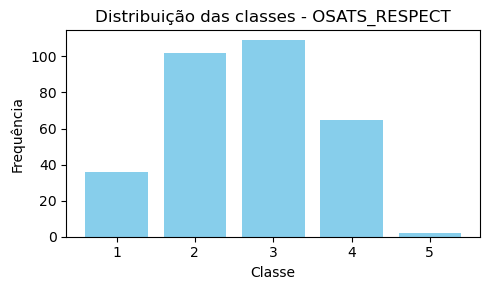

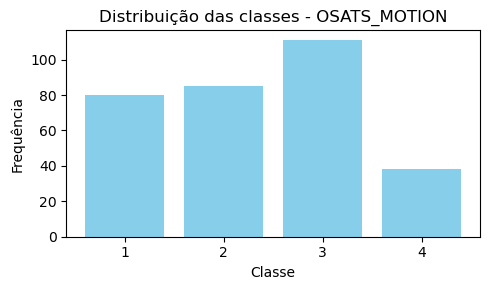

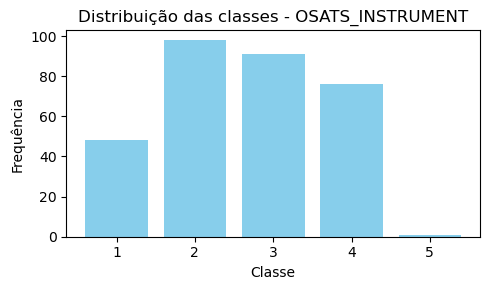

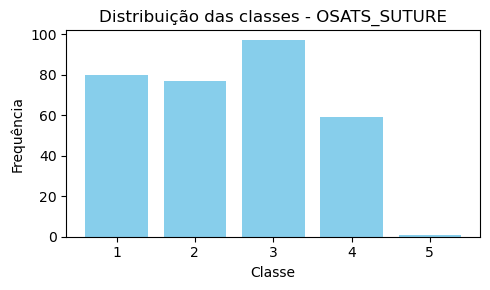

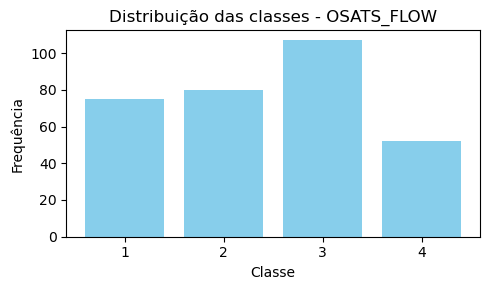

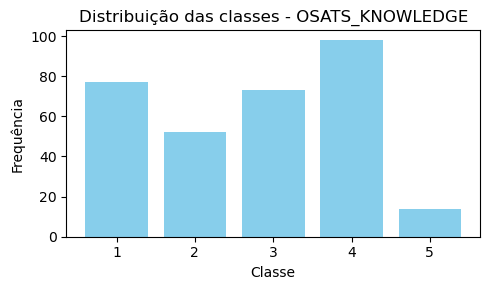

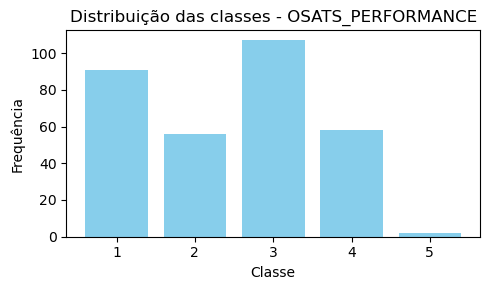

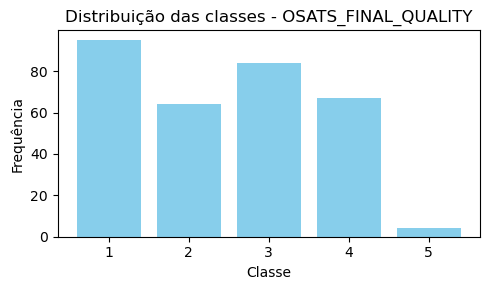

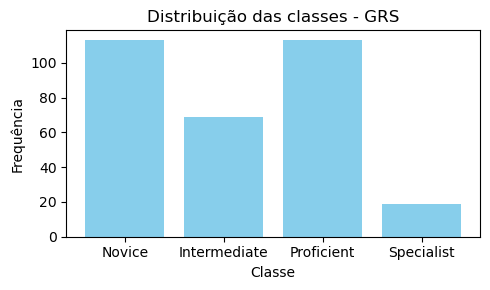

In [11]:
import matplotlib.pyplot as plt

def plot_class_distribution(df, columns, class_names=None):
    """
    Plota a distribuição de classes para cada coluna da lista.
    
    Args:
        df: DataFrame com as colunas de interesse.
        columns: Lista de colunas para plotar.
        class_names: Lista de nomes das classes (opcional).
    """
    
    for col in columns:
        plt.figure(figsize=(5,3))
        counts = df[col].value_counts().sort_index()
        plt.bar(counts.index, counts.values, color='skyblue')
        plt.xlabel('Classe')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das classes - {col}')
        if class_names and len(class_names) >= counts.index.max()+1:
            plt.xticks(counts.index, class_names)
        else:
            plt.xticks(counts.index)
        plt.tight_layout()
        plt.show()

colunas = [
    "OSATS_RESPECT",
    "OSATS_MOTION",
    "OSATS_INSTRUMENT",
    "OSATS_SUTURE",
    "OSATS_FLOW",
    "OSATS_KNOWLEDGE",
    "OSATS_PERFORMANCE",
    "OSATS_FINAL_QUALITY",
    "GRS"
]

nomes_classes = ["Novice", "Intermediate", "Proficient", "Specialist"]

plot_class_distribution(df_video, colunas, class_names=nomes_classes)


## OSATS Criteria
- Ratings de 2 e 3 são os mais comuns 
- Rating de 5 é extremamente raro, não existindo em alguns casos 

## GRS 
- Maior parte dos estudantes estão num nivel novice ou proficient 
- Existem poucos casos de Specialist no dataset 


## Observações 

Em ambos os criterios, o dataset encontrasse desbalanceado, principalmente nos scores mais altos. 
Tal desbalanceamento deve ser considerado nas seguintes fases. 


# Video Analise 

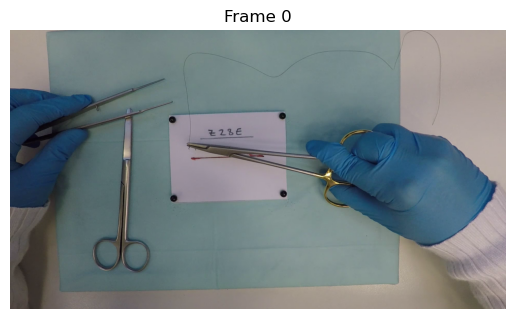

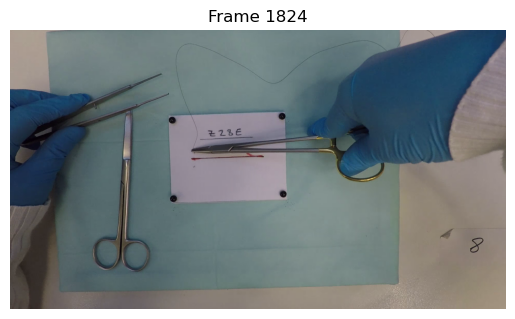

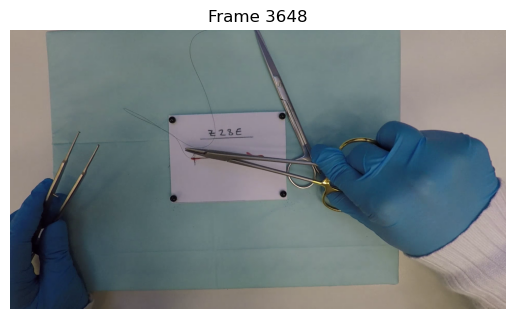

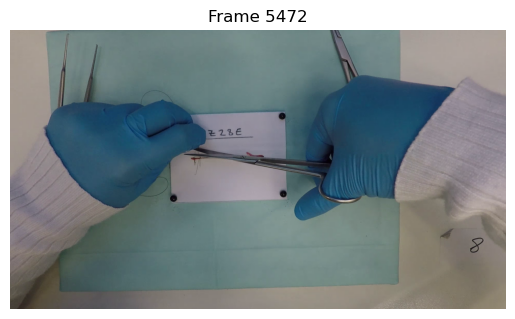

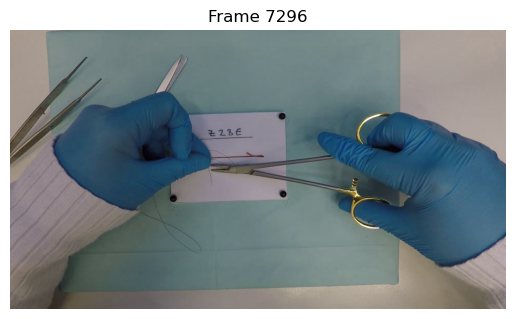

FPS: 29.973316452221283
Total de frames: 9120
Resolução: 1920x1080
Duração (s): 304.27


In [15]:
import cv2
import matplotlib.pyplot as plt

video_path = "data_raw/input.mp4"

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
duration = frame_count / fps



for i in range(0, frame_count, frame_count // 5):  # 5 frames distribuídos
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {i}")
        plt.axis('off')
        plt.show()

print(f"FPS: {fps}")
print(f"Total de frames: {frame_count}")
print(f"Resolução: {width}x{height}")
print(f"Duração (s): {duration:.2f}")

cap.release()